The problem statement is to analyse sales and predict it based on money spent on advertising 

In [183]:
#supress warnings 
import warnings 
warnings.filterwarnings('ignore')

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [185]:
df = pd.DataFrame(pd.read_csv("advertising.csv"))

In [186]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [187]:
df.shape

(200, 4)

Data has 200 rows and 4 columns 

In [188]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [190]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Data Cleaning 

In [191]:
#checking duplicates 
sum(df.duplicated(subset="TV")) == 0
#Duplicate values do exist, and it could be, no problem

False

In [192]:
#Checking Null Values 
df.isnull().sum()*100/ df.shape[0]
#There are no null values in the data set hence it is clean 

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

Exploratory Data Analysis (EDA)

Univariate Analysis 

Sales: Target Variable 


In [193]:
df.Sales.describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

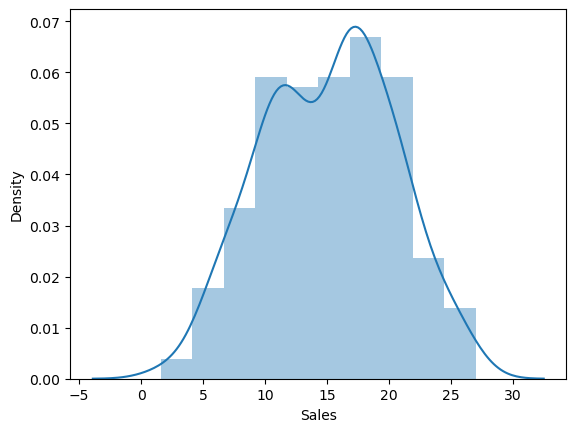

In [194]:
sns.distplot(df['Sales'])
plt.show()
#sales ki kaunsi value kitni baar aa rahi hai - how dense is the data 

distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

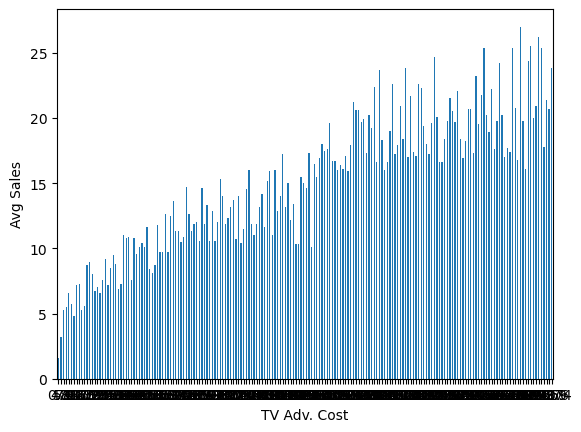

In [195]:
# Lets see how sales varies with TV Advertising
df_sales_tv = df[['TV', 'Sales']].groupby(
    "TV",
    as_index=False).mean().rename(columns={'Cost': 'TV_avg_cost'})
plt1 = df_sales_tv.plot(x='TV',
                              kind='bar',
                              legend=False,
                              sort_columns=True)
plt1.set_xlabel("TV Adv. Cost")
plt1.set_ylabel("Avg Sales")
xticks(rotation=0)
plt.show()

In [196]:
#the more the TV advertising, the more the sales 


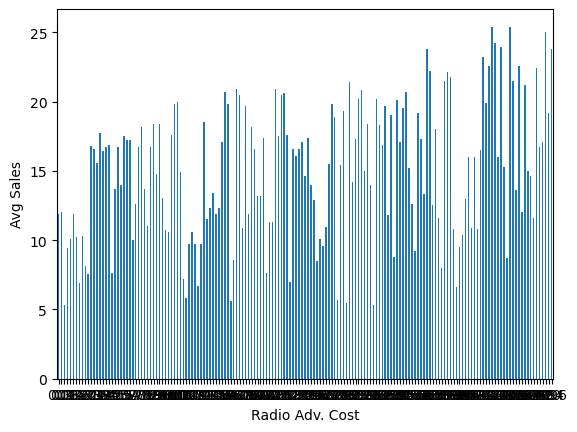

In [197]:
df_sales_Radio = df[['Radio', 'Sales']].groupby(
    "Radio",
    as_index=False).mean().rename(columns={'Cost': 'Radio_avg_cost'})
plt1 = df_sales_Radio.plot(x='Radio',
                              kind='bar',
                              legend=False,
                              sort_columns=True)
plt1.set_xlabel("Radio Adv. Cost")
plt1.set_ylabel("Avg Sales")
xticks(rotation=0)
plt.show()

In [198]:
# the graph is increasing but has a lesser slope 

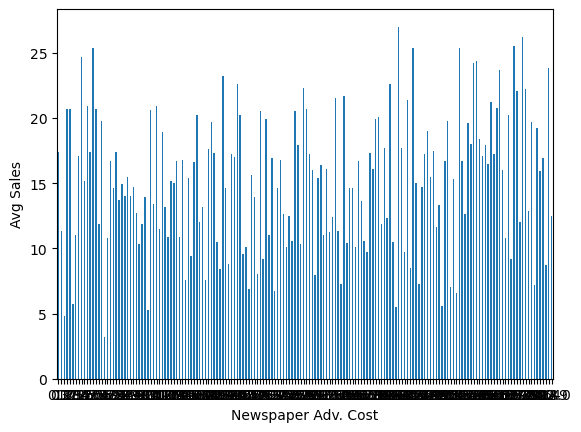

In [199]:
df_sales_Newspaper = df[['Newspaper', 'Sales']].groupby(
    "Newspaper",
    as_index=False).mean().rename(columns={'Cost': 'Newspaper_avg_cost'})
plt1 = df_sales_Newspaper.plot(x='Newspaper',
                              kind='bar',
                              legend=False,
                              sort_columns=True)
plt1.set_xlabel("Newspaper Adv. Cost")
plt1.set_ylabel("Avg Sales")
xticks(rotation=0)
plt.show()

In [200]:
#Inference
# this has an even lesser effect, i.e. TV Advertising is the most impactful 

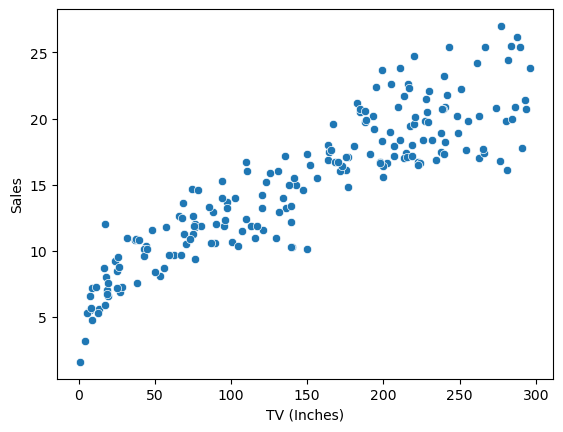

In [201]:
plt1 = sns.scatterplot(x='TV', y='Sales', data=df)
plt1.set_xlabel('TV (Inches)')
plt1.set_ylabel('Sales')
plt.show()

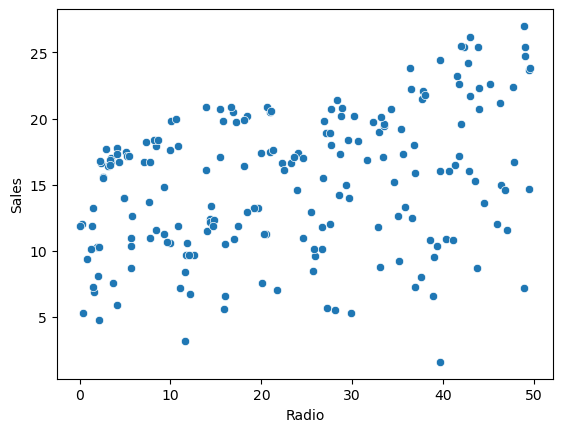

In [202]:
plt1 = sns.scatterplot(x='Radio', y='Sales', data=df)
plt1.set_xlabel('Radio')
plt1.set_ylabel('Sales')
plt.show()

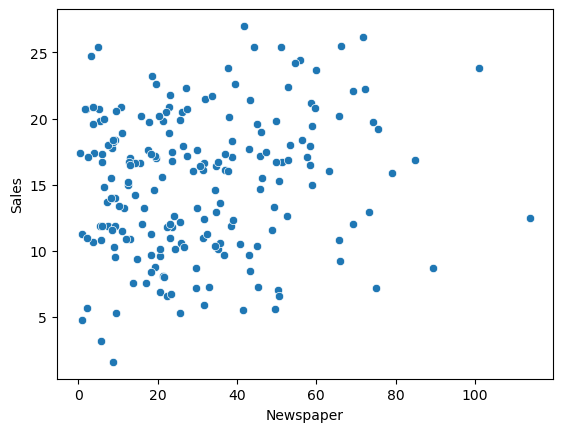

In [203]:
plt1 = sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt1.set_xlabel('Newspaper')
plt1.set_ylabel('Sales')
plt.show()

In [204]:
#Inference
#TV has maximum effect, Radio little lesser, Newspaper almost nil

Feature Engineering 
I will create a new column total cost by adding TV + Radio + Newspaper Costs and then compare it with sales 


In [205]:
df['Total_Cost'] = df['TV'] + df['Radio'] + df['Newspaper']

In [206]:
df

,TV,Radio,Newspaper,Sales,Total_Cost
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,14.0,107.2
197,177.0,9.3,6.4,14.8,192.7
198,283.6,42.0,66.2,25.5,391.8


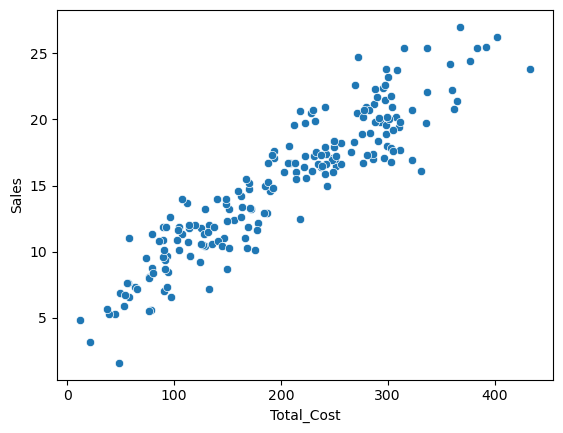

In [207]:
#lets see how total sales is varying with the cost input 
plt1 = sns.scatterplot(x='Total_Cost', y='Sales', data=df)
plt1.set_xlabel('Total_Cost')
plt1.set_ylabel('Sales')
plt.show()


Bivariate Analysis

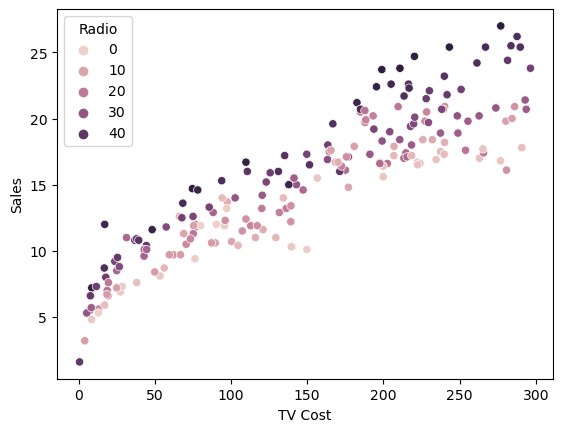

In [208]:
plt1 = sns.scatterplot(x='TV', y='Sales', 
                       hue='Radio', data=df)
plt1.set_xlabel('TV Cost')
plt1.set_ylabel('Sales')
plt.show()

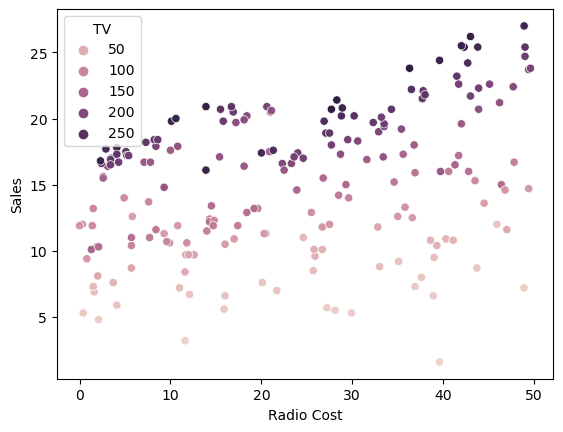

In [209]:
plt1 = sns.scatterplot(x='Radio', y='Sales', 
                       hue='TV', data=df)
plt1.set_xlabel('Radio Cost')
plt1.set_ylabel('Sales')
plt.show()

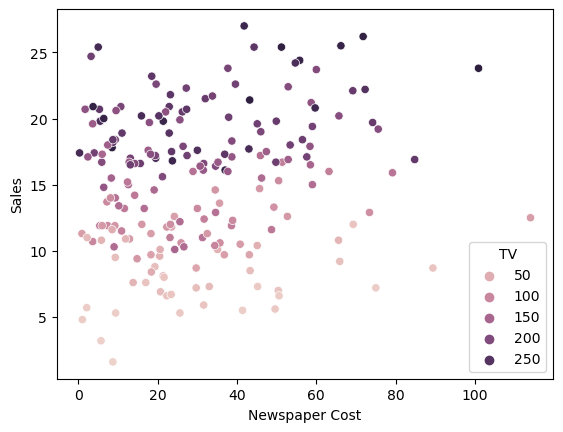

In [210]:
plt1 = sns.scatterplot(x='Newspaper', y='Sales', 
                       hue='TV', data=df)
plt1.set_xlabel('Newspaper Cost')
plt1.set_ylabel('Sales')
plt.show()

In [211]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'Total_Cost'], dtype='object')

In [212]:
full = df[['TV', 'Radio', 'Newspaper', 'Sales', 'Total_Cost']]

In [213]:
full.head()

,TV,Radio,Newspaper,Sales,Total_Cost
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


Visualising the data - Visualising Numeric Variables 

<Figure size 1500x1500 with 0 Axes>

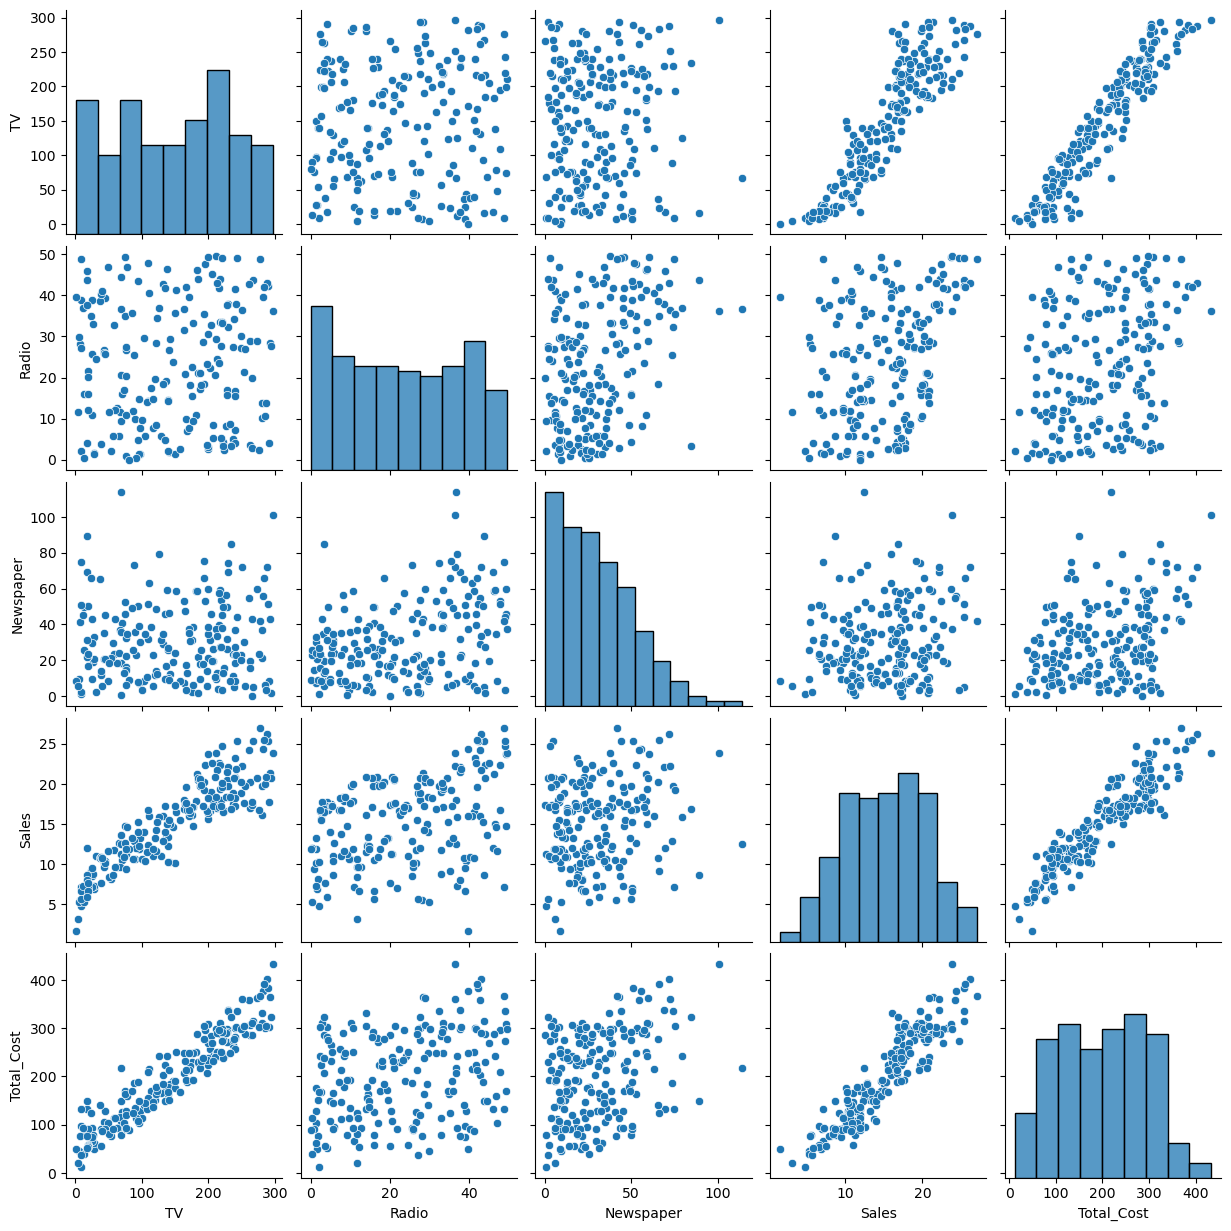

In [214]:
plt.figure(figsize=(15, 15))
sns.pairplot(full)
plt.show()


Visualising Categorical Variables 

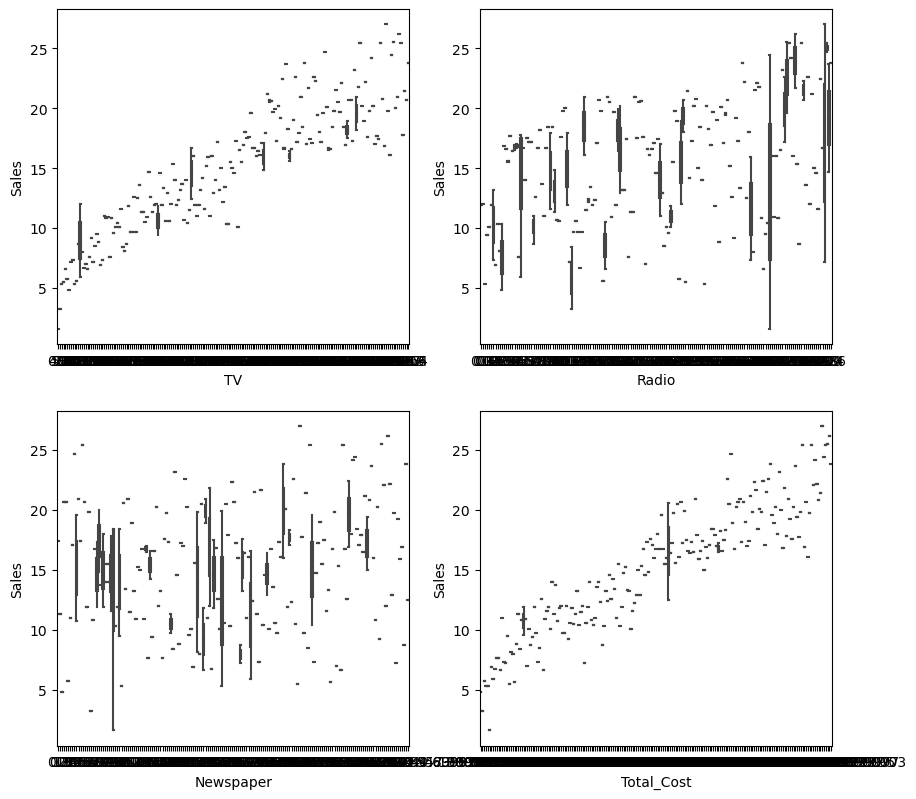

In [215]:
plt.figure(figsize=(10, 20))
plt.subplot(4, 2, 1)
sns.boxplot(x='TV', y='Sales', data=full)
plt.subplot(4, 2, 2)
sns.boxplot(x='Radio', y='Sales', data=full)
plt.subplot(4, 2, 3)
sns.boxplot(x='Newspaper', y='Sales', data=full)
plt.subplot(4, 2, 4)
sns.boxplot(x='Total_Cost', y='Sales', data=full)
plt.show()

Building the Linear Regression Model 

In [216]:
# Splitting the data into training and testing splits 
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(full,
                                     train_size=0.7,
                                     test_size=0.3,
                                     random_state=100)

In [217]:
#Rescaling the features 
from sklearn.preprocessing import MinMaxScaler

In [218]:
scaler = MinMaxScaler()

In [219]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = [
    'TV', 'Radio', 'Newspaper', 'Sales'
]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [220]:
df_train.head()

,TV,Radio,Newspaper,Sales,Total_Cost
74,0.719310,0.495968,0.112577,0.606299,251.1
3,0.509976,0.832661,0.511873,0.586614,251.3
185,0.690903,0.909274,0.169745,0.826772,269.7
26,0.480893,0.590726,0.108179,0.527559,184.8
90,0.451809,0.098790,0.079156,0.488189,148.5


In [221]:
df_train.describe()

,TV,Radio,Newspaper,Sales,Total_Cost
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.497164,0.462226,0.273879,0.527784,202.077857
std,0.314055,0.305200,0.199007,0.220798,100.893100
min,0.000000,0.000000,0.000000,0.000000,11.700000
25%,0.223199,0.199597,0.112137,0.362205,111.225000
50%,0.488333,0.467742,0.210642,0.547244,210.700000
75%,0.777477,0.736391,0.399956,0.696850,288.425000
max,1.000000,1.000000,1.000000,1.000000,433.600000


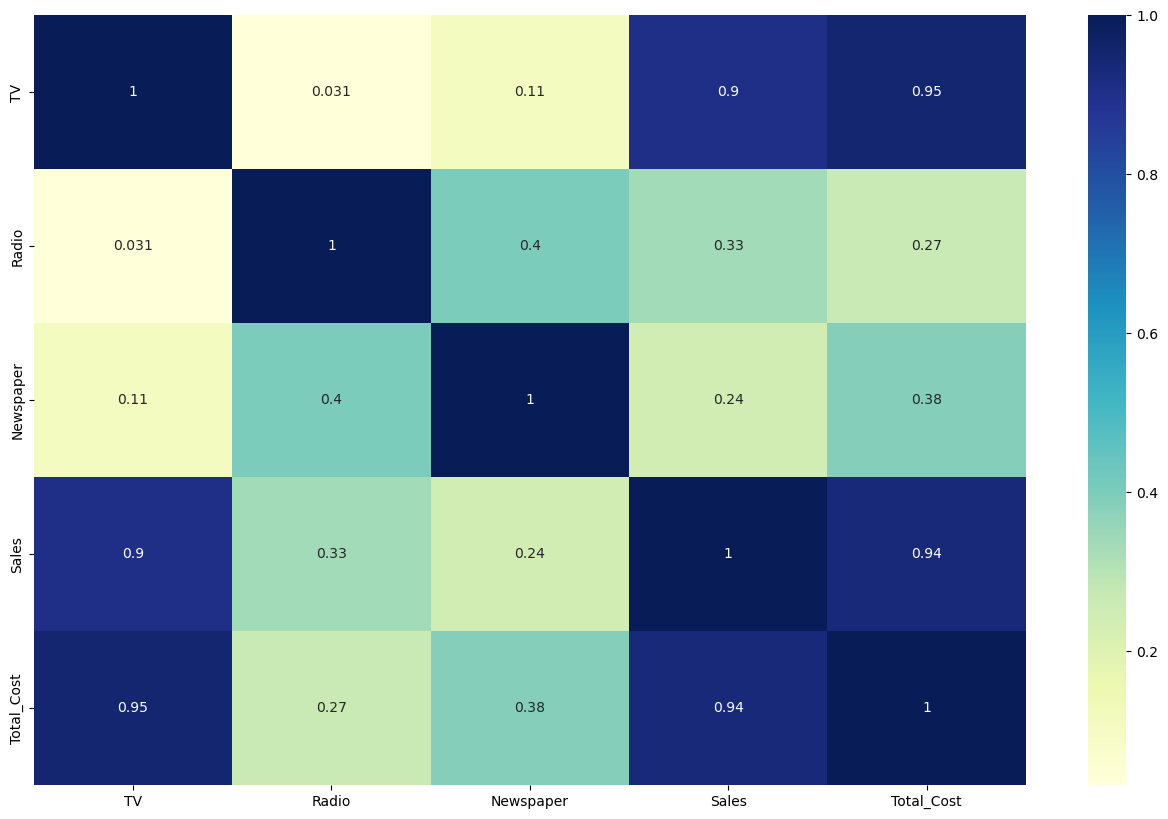

In [222]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [223]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('Sales')
X_train = df_train

In [224]:
X_train.head()

,TV,Radio,Newspaper,Total_Cost
74,0.719310,0.495968,0.112577,251.1
3,0.509976,0.832661,0.511873,251.3
185,0.690903,0.909274,0.169745,269.7
26,0.480893,0.590726,0.108179,184.8
90,0.451809,0.098790,0.079156,148.5


In [225]:
X_train.shape

(140, 4)

RFE
Recursive Feature Elimination 

In [226]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [227]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [228]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TV', True, 1),
 ('Radio', True, 1),
 ('Newspaper', True, 1),
 ('Total_Cost', True, 1)]

In [229]:
col = X_train.columns[rfe.support_]
col

Index(['TV', 'Radio', 'Newspaper', 'Total_Cost'], dtype='object')

In [230]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [231]:
# Adding a constant variable
import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)

In [232]:
lm = sm.OLS(y_train, X_train_rfe).fit()  # Running the linear model

In [233]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           4.73e-71
Time:                        12:37:26   Log-Likelihood:                 182.27
No. Observations:                 140   AIC:                            -356.5
Df Residuals:                     136   BIC:                            -344.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1073      0.014      7.633      0.0

In [234]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [
    variance_inflation_factor(X.values, i) for i in range(X.shape[1])
]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,TV,inf
2,Radio,inf
3,Newspaper,inf
4,Total_Cost,inf
0,const,0.0


In [240]:
# Adding a constant variable
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train_lm).fit()  # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
y_train_price = lm.predict(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           4.73e-71
Time:                        12:37:54   Log-Likelihood:                 182.27
No. Observations:                 140   AIC:                            -356.5
Df Residuals:                     136   BIC:                            -344.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1073      0.014      7.633      0.0

Text(0.5, 0, 'Errors')

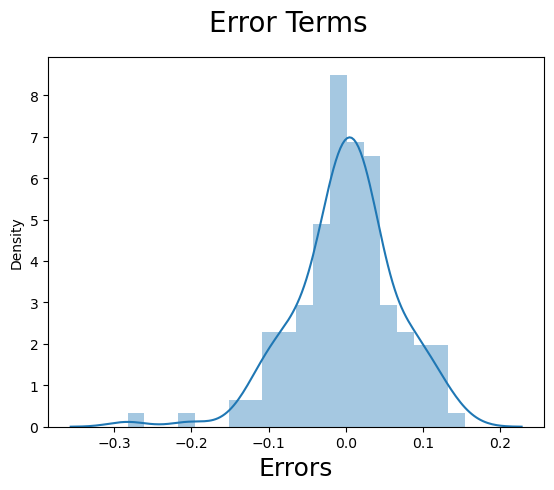

In [236]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize=20)  # Plot heading
plt.xlabel('Errors', fontsize=18)  # X-label

In [237]:
y_test = df_test.pop('Sales')
X_test = df_test

In [242]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [244]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [245]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

-4.528980430845994

Text(0, 0.5, 'y_pred')

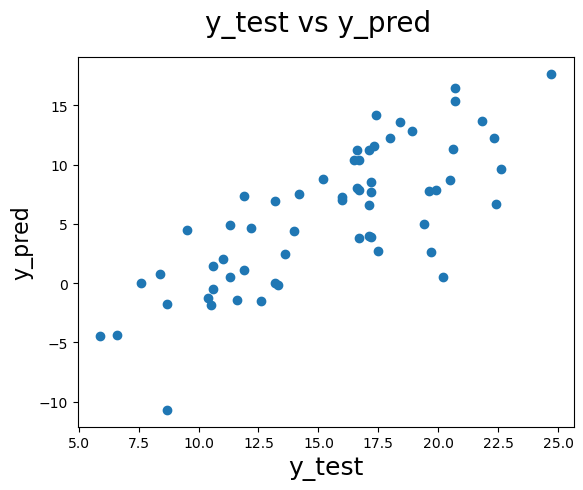

In [246]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  # Plot heading
plt.xlabel('y_test', fontsize=18)  # X-label
plt.ylabel('y_pred', fontsize=16)  # Y-label